In [2]:
import matplotlib.pyplot as plt
import numpy as np

data=np.loadtxt("nagoya.txt")
data=data.transpose()
tdata=[data[i].reshape(51,12) for i in range(6)]
span=len(tdata[0])
year=[]
for i in range(span):
    year.append(tdata[0][i][0])
year=np.array(year)
manth=np.array([i for i in range(1,13)])

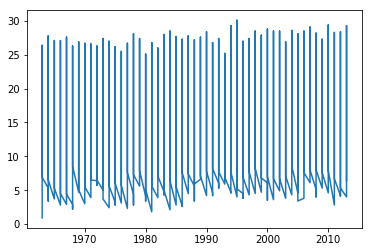

In [3]:
#1.全年にわたる気温の変化の推移を示した折れ線グラフ
plt.plot(data[0],data[2])
plt.show()

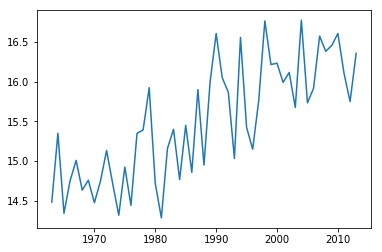

In [4]:
#2.各年の平均気温の推移を示した折れ線グラフ
average_temp_y=[]
for i in range(span):
    average_temp_y.append((tdata[2][i]).mean())
plt.plot(year,average_temp_y)
plt.show()

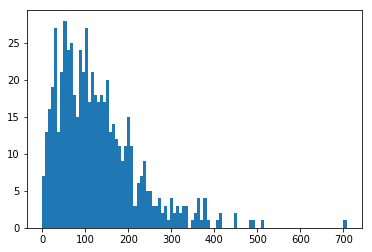

In [5]:
#3.全年を通した降水量のヒストグラム
plt.hist(data[3], 100)
plt.show()

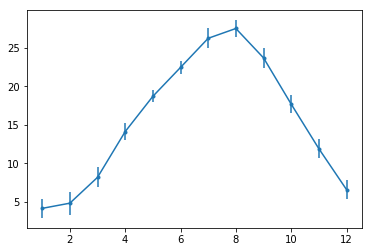

In [6]:
#4.各月の平均気温を折れ線で表したもの．ただし，エラーバー（上下の長さをそれぞれ標準偏差にしたもの）つき．
average_temp_m=[
    np.array([tdata[2][j][i] for j in range(span)]).mean()
    for i in range(12)
]
std=[
    np.std(np.array([tdata[2][j][i] for j in range(span)]))
    for i in range(12)
]
plt.errorbar(manth, average_temp_m, yerr=std, fmt='.-')
plt.show()

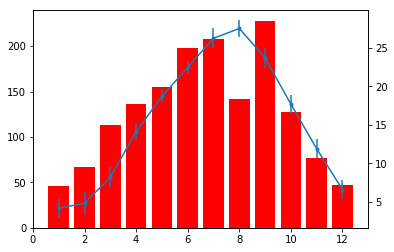

In [7]:
#5.４のグラフに，月ごとの平均降水量の棒グラフを加えたもの
average_mois_m=[
    np.array([tdata[3][j][i] for j in range(span)]).mean()
    for i in range(12)
]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(manth,average_mois_m,color="r")
ax2.errorbar(manth, average_temp_m, yerr=std, fmt='.-')
ax1.set_zorder(1)
ax2.set_zorder(2)
ax1.patch.set_alpha(0)
plt.show()

612
[73, 440, 99]


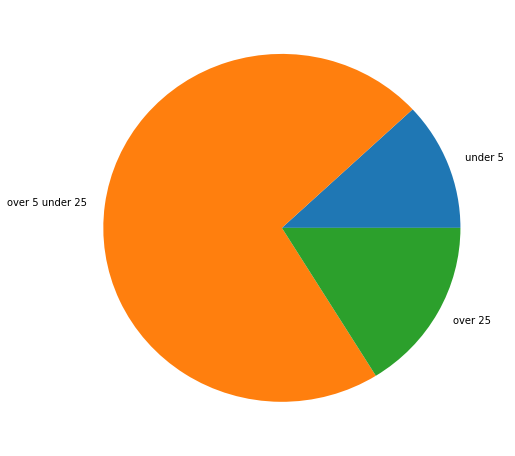

In [8]:
#6. 全年にわたる，平均気温が5度未満，5度以上25度未満，25度以上の割合を表す円グラフ
u5=0
o5u25=0
o25=0
for i  in range(len(data[2])):
    if data[2][i]<5:
        u5+=1
    if 5<=data[2][i]<25:
        o5u25+=1
    if 25<=data[2][i]:
        o25+=1
x=[u5,o5u25,o25]
print(len(data[2]))
print(x)
labels= ["under 5","over 5 under 25","over 25"]
plt.figure(figsize=(8, 8))
plt.pie(x, labels=labels)
plt.show()

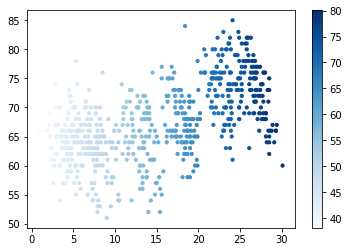

In [9]:
#7. 全年にわたり，横軸を気温，縦軸を湿度として，点の大きさもしくは色を以下の式で計算される不快指数とした散布図
def calc(T,H):
    d=0.81*T+0.01*H*(0.99*T-14.3)+46.3
    return d
discomfort=np.array([calc(data[2][i],data[4][i]) for i in range(len(data[2])) ])
# print(discomfort)
plt.scatter(data[2], data[4], s=10,c=discomfort, cmap='Blues')
plt.colorbar()
plt.show()

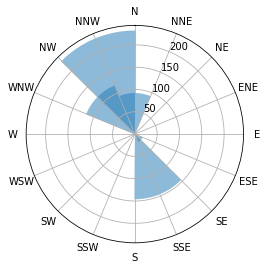

In [10]:
#8. 全年にわたる風向のヒストグラムを極座標で表現したもの
wind=np.histogram(data[5],bins=16)[0]
# print(data[5])
# print(wind)
theta = np.linspace(0.0, 2 * np.pi, 16, endpoint=False)
# radii = 10 * np.random.rand(15)

ps = plt.subplot(polar=True)
ps.axes.set_theta_direction(-1)
ps.axes.set_theta_zero_location('N')
ps.axes.set_thetagrids(np.arange(16)*22.5,
                       ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW'])
ps.bar(theta, wind, bottom=0.0,  alpha=0.5)
# ax.invert_xaxis()
plt.show()

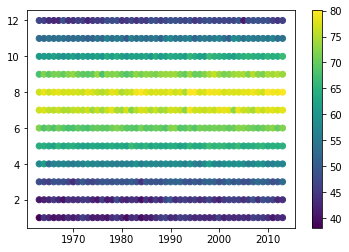

In [11]:
plt.scatter(data[0],data[1],c=discomfort)
plt.colorbar()

plt.show()

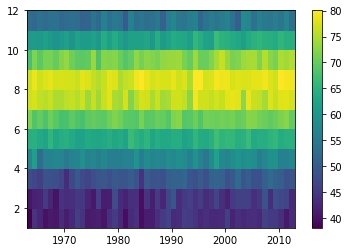

In [12]:
discomfort_pcolor=discomfort.reshape(51,12).T
# discomfort
plt.pcolor(year,manth,discomfort_pcolor)
plt.colorbar()
plt.show()
# plt.pcolor(discomfort_pcolor)